# Capstone Webscraping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background

Alasan saya tertarik untuk memilih scraping ini karena saya biasa transaksi di forex, dimana scraping ini sangat erat kaitannya dengan dunia forex. Dari hasil scraping ini, akan saya kembangkan ke hasil scraping yang lain untuk membuat pola scraping yang sama tetapi dengan mata uang yang berbeda sebagai keperluan pribadi untuk analisa pasar dan juga untuk dibagikan kepada rekan-rekan yang biasa transaksi di forex.

In [1]:
import requests

url_get = requests.get('https://www.exchange-rates.org/exchange-rate-history/usd-idr')

To visualize what exactly you get from the `request.get`, we can use `.content` so see what we exactly get (HTML content), in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>USD to IDR exchange rate history</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n<base href="http'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's create a BeautifulSoup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [4]:
print(soup.prettify()[:500])

<!DOCTYPE html>
<!--[if lt IE 9]>
<html class="no-js ie8 oldie" lang="en" xml:lang='en'>
<![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en" xml:lang="en">
 <!--<![endif]-->
 <head>
  <title>
   USD to IDR exchange rate history
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=5" name="viewport"/>
  <meta charset="utf-8">
   <meta content="text/html; charset=utf-8" http-equiv="Content-Type">
   


## Finding the right key to scrap the data & Extracting the right information

Untuk mendapatkan informasi yang penting dibutuhkan kata kunci dengan menggunakan .find(). Kita dapat mengeksplor struktur dari html dengan melakukan inspect pada halaman html nya dan dibantu dengan menggunakan .prettify()

In [5]:
table = soup.find('table', attrs={'cellpadding':'0'})
print(table.prettify()[1:500])

table border="0" cellpadding="0" cellspacing="0" class="history-rates-data">
 <thead>
  <tr>
   <th class="ltr-bidi-fix">
    Date
   </th>
   <th class="ltr-bidi-fix">
    US Dollar to Indonesian Rupiah
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td>
    <a class="w" href="/exchange-rate-history/usd-idr-2024-04-26">
     April 26, 2024
    </a>
    <a class="n" href="/exchange-rate-history/usd-idr-2024-04-26">
     2024-4-26
    </a>
   </td>
   <td>
    <span class="w">
     <span class="n


In [6]:
table.find_all('a', attrs={'class':'w'})

[<a class="w" href="/exchange-rate-history/usd-idr-2024-04-26">April 26, 2024</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2024-04-25">April 25, 2024</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2024-04-24">April 24, 2024</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2024-04-23">April 23, 2024</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2024-04-22">April 22, 2024</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2024-04-19">April 19, 2024</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2024-04-18">April 18, 2024</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2024-04-17">April 17, 2024</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2024-04-16">April 16, 2024</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2024-04-15">April 15, 2024</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2024-04-12">April 12, 2024</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2024-04-11">April 11, 2024</a>,
 <a 

In [7]:
table.find_all('a', attrs={'class':'w'})[0].text

'April 26, 2024'

Next, we need to find the row length.

In [8]:
row = table.find_all('a', attrs={'class':'w'})
row_length = len(row)
row_length

130

Setelah mendapatkan panjang barisnya kali ini akan dilakukan looping. Dibuatkan sebuah wadah dalam variabel yang baru serta diatur agar tampilannya nanti tidak berantakan dengan menggunakan .strip()

In [9]:
temp = []  # Initiating a tuple

for i in range(0, row_length):

    #Get Period 
    period = table.find_all('a', attrs={'class':'w'})[i].text
    period = period.strip() #to remove excess white space
    
    #Get Kurs
    kurs = table.find_all('span', attrs={'class':'w'})[i].text
    kurs = kurs.strip() #to remove excess white space
    
    temp.append((period,kurs))
    
temp

[('April 26, 2024', '$1 = Rp16,241'),
 ('April 25, 2024', '$1 = Rp16,193'),
 ('April 24, 2024', '$1 = Rp16,212'),
 ('April 23, 2024', '$1 = Rp16,143'),
 ('April 22, 2024', '$1 = Rp16,238'),
 ('April 19, 2024', '$1 = Rp16,218'),
 ('April 18, 2024', '$1 = Rp16,210'),
 ('April 17, 2024', '$1 = Rp16,243'),
 ('April 16, 2024', '$1 = Rp16,303'),
 ('April 15, 2024', '$1 = Rp16,083'),
 ('April 12, 2024', '$1 = Rp16,118'),
 ('April 11, 2024', '$1 = Rp16,011'),
 ('April 10, 2024', '$1 = Rp16,001'),
 ('April 9, 2024', '$1 = Rp15,892'),
 ('April 8, 2024', '$1 = Rp15,912'),
 ('April 5, 2024', '$1 = Rp15,888'),
 ('April 4, 2024', '$1 = Rp15,896'),
 ('April 3, 2024', '$1 = Rp15,942'),
 ('April 2, 2024', '$1 = Rp15,952'),
 ('April 1, 2024', '$1 = Rp15,951'),
 ('March 29, 2024', '$1 = Rp15,880'),
 ('March 28, 2024', '$1 = Rp15,891'),
 ('March 27, 2024', '$1 = Rp15,901'),
 ('March 26, 2024', '$1 = Rp15,821'),
 ('March 25, 2024', '$1 = Rp15,784'),
 ('March 22, 2024', '$1 = Rp15,814'),
 ('March 21, 2024',

In [10]:
temp = temp[::-1]
temp

[('October 30, 2023', '$1 = Rp15,854'),
 ('October 31, 2023', '$1 = Rp15,919'),
 ('November 1, 2023', '$1 = Rp15,899'),
 ('November 2, 2023', '$1 = Rp15,852'),
 ('November 3, 2023', '$1 = Rp15,589'),
 ('November 6, 2023', '$1 = Rp15,577'),
 ('November 7, 2023', '$1 = Rp15,651'),
 ('November 8, 2023', '$1 = Rp15,625'),
 ('November 9, 2023', '$1 = Rp15,715'),
 ('November 10, 2023', '$1 = Rp15,694'),
 ('November 13, 2023', '$1 = Rp15,683'),
 ('November 14, 2023', '$1 = Rp15,459'),
 ('November 15, 2023', '$1 = Rp15,519'),
 ('November 16, 2023', '$1 = Rp15,484'),
 ('November 17, 2023', '$1 = Rp15,424'),
 ('November 20, 2023', '$1 = Rp15,389'),
 ('November 21, 2023', '$1 = Rp15,517'),
 ('November 22, 2023', '$1 = Rp15,656'),
 ('November 23, 2023', '$1 = Rp15,633'),
 ('November 24, 2023', '$1 = Rp15,540'),
 ('November 27, 2023', '$1 = Rp15,505'),
 ('November 28, 2023', '$1 = Rp15,352'),
 ('November 29, 2023', '$1 = Rp15,459'),
 ('November 30, 2023', '$1 = Rp15,559'),
 ('December 1, 2023', '$1

Note: You can customize the code inside the loop according to your needs to extract the desired information from the website you scrap. Make sure to check and adjust the code well to suit the HTML structure and information you want to retrieve.

## Creating data frame & Data wrangling

Once we have extracted the data, we can put it into a dataframe.

In [11]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('period', 'kurs'))
df.head()

,period,kurs
0,"October 30, 2023","$1 = Rp15,854"
1,"October 31, 2023","$1 = Rp15,919"
2,"November 1, 2023","$1 = Rp15,899"
3,"November 2, 2023","$1 = Rp15,852"
4,"November 3, 2023","$1 = Rp15,589"


### Data Cleansing

Setelah mendapatkan info yang dibutuhkan dan tampilannya sudah rapi, saatnya untuk memperbaiki kategori data agar dapat dianalisa dengan baik dengan tampilan yang sesuai.

In [12]:
df.dtypes

period    object
kurs      object
dtype: object

In [13]:
df['kurs'] = [x.strip('$1') for x in df['kurs']]
df['kurs'] = [x.strip(' = Rp') for x in df['kurs']]
df['kurs'] = df['kurs'].str.replace(',','.')
df['kurs'] = df['kurs'].astype('float64')
df['period'] = df['period'].astype('datetime64[ns]')

In [14]:
df.dtypes

period    datetime64[ns]
kurs             float64
dtype: object

### Data Visualization

Setelah kategori data sudah sesuai saatnya untuk menampilkan data kurs dengan mengatur kolom pada tabel period sebagai index dalam tampilannya.

In [15]:
df = df.set_index('period')

<Axes: xlabel='period'>

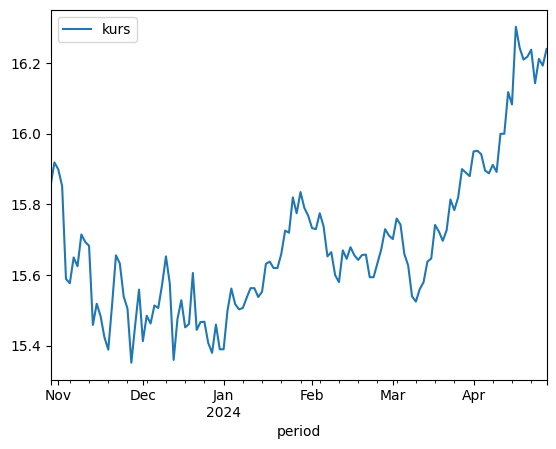

In [16]:
df.plot()

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Change the title of the dashboard in `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualization.

## Analysis

Dari visualisasi yang telah dibuat sangat jelas bahwa nilai mata uang rupiah cenderung melemah dengan terus meningkatnya nilai tukar rupiah terhadap usd yang sudah mencapai di range angka 16 ribuan rupiah. Kesimpulan dari data tersebut dimana nilai tukar rupiah yang melemah dikarenakan cuaca yang kurang baik sehingga membuat sektor pangan membutuhkan import untuk memastikan kebutuhan pangan dalam negeri tercukupi. Hal yang bisa membantu untuk menguatkan nilai tukar rupiah jika memang dalam sektor pangan melemah adalah dengan mengembangkan sektor pariwisata yang saat ini sangat diminati turis mancanegara. Sehingga kalaupun masih tetap melakukan import dalam sektor pangan, setidaknya ada penguatan nilai rupiah dengan pesatnya sektor pariwisata yang sudah pasti akan sedikit meringankan beban negara ketika melakukan import dengan menguatnya nilai rupiah.

### Extra Challange

This will be not included to the scoring. 

- You can create additional visualization/analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.